In [5]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

In [7]:
%%script echo skipping
import serial
import time
nodeMcu=serial.Serial('COM5',9600)

Couldn't find program: 'echo'


In [8]:
# Set the location and name of the cfg file
cfg_file = './cfg/yolov3.cfg'

# Set the location and name of the pre-trained weights file
weight_file = './weights/yolov3.weights'

# Set the location and name of the COCO object classes file
namesfile = 'data/coco.names'

# Load the network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# Load the COCO object classes
class_names = load_class_names(namesfile)

In [9]:
# Print the neural network used in YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

In [1]:
import cv2
import time

cam = cv2.VideoCapture(1, cv2.CAP_DSHOW)
start_time = time.time()

while True:
    check, frame = cam.read()
    
    cv2.imshow('video', frame)
    key = cv2.waitKey(1)

    if key == 27:  # Press 'Esc' to exit the program
        break
    elif key == ord('s') or time.time() - start_time >= 2:
        # Press 's' or 'S' to save the current frame as an image
        cv2.imwrite('captured_image.jpg', frame)
        print("Image saved as 'captured_image.jpg'")
        break

cam.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'




It took 1.283 seconds to detect the objects in the image.

Number of Objects Detected:hello 1 

Objects Found and Confidence Level:

1. clock: 0.999970
hello
1 -centre== 268.0  ,  394.0
ratio= 1.0


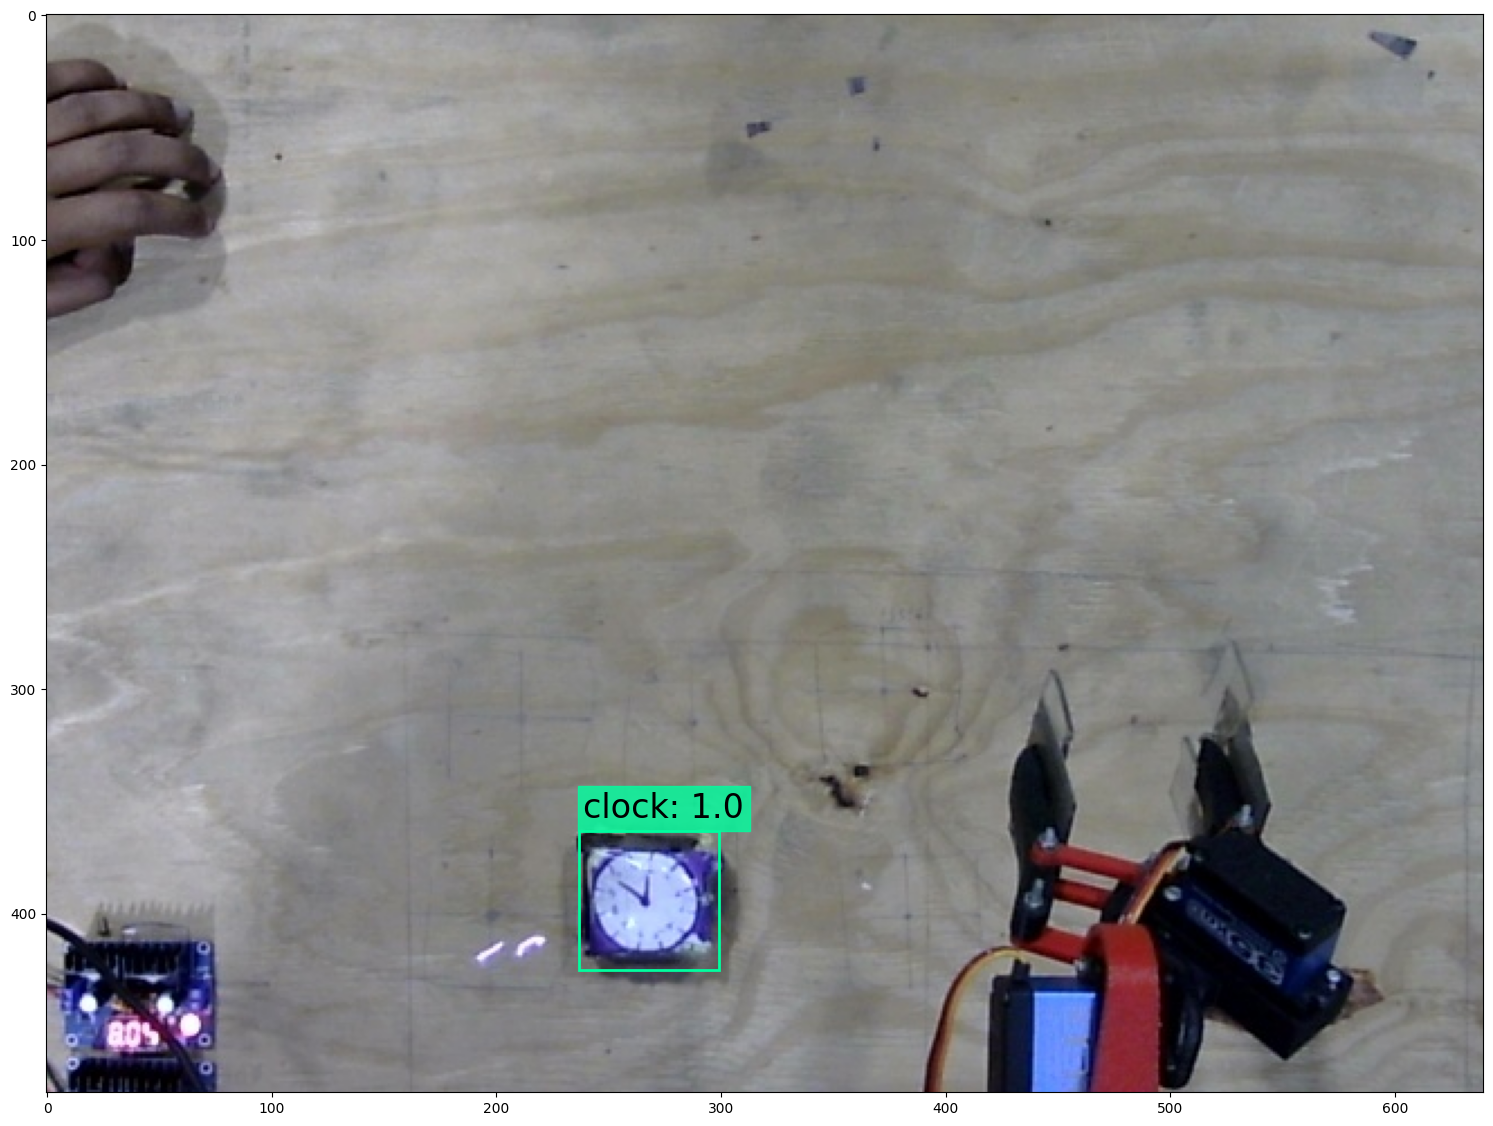

In [ ]:
# Set the NMS threshold
nms_thresh = 0.6 
# Set the IOU threshold
iou_thresh = 0.4

# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = cv2.imread('./captured_image.jpg')
#(this if u want to use camera)
#img = cv2.imread('./images/bottle45 2.jpg')
#(this if u directly put a image link)
# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

# Set the IOU threshold. Default value is 0.4
iou_thresh = 0.4

# Set the NMS threshold. Default value is 0.6
nms_thresh = 0.6

# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

#some other information

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
new_array=plot_boxes(original_image, boxes, class_names, plot_labels = True)
xc1=new_array[0]
yc1=new_array[1]
if img is not None:
    height, width, channels = img.shape
    a=width
    b=height
else:
    print("Failed to load the image.")


In [ ]:
print(a,"   ",b)
#these are the pixels of the image which we are using as object

xc=xc1-a/2
yc=b-yc1
#this we are doing to rotate the coordinate axis to right hnd coordinate system having centre on the bottom line


print(xc,' , ',yc)


640     480
-52.0  ,  86.0


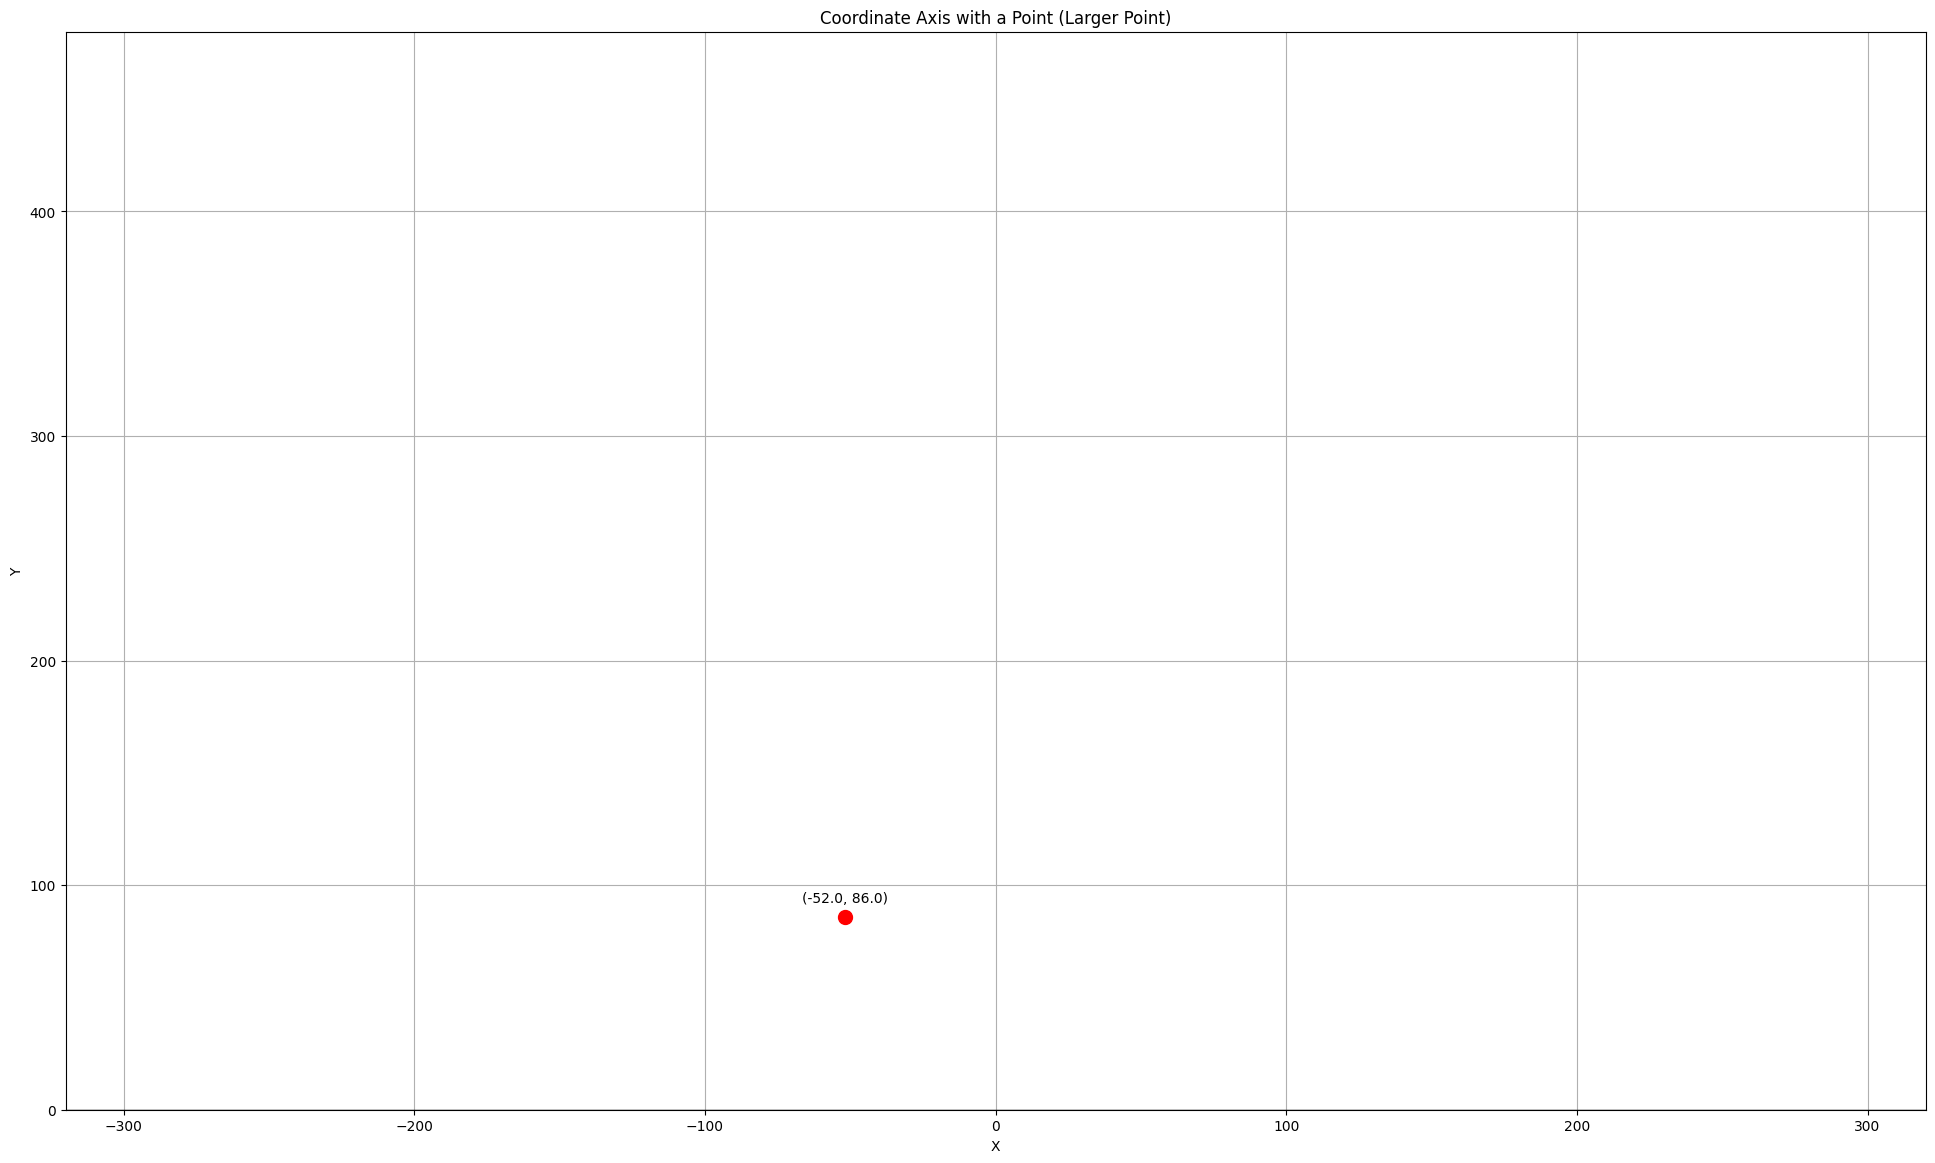

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Set the axis limits
ax.set_xlim(-a/2, a/2)
ax.set_ylim(0, b)

# Plot the axes (y-axis only)
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='none')  # Hide the x-axis

# Plot the point (xc, yc) with a larger marker size
ax.plot(xc, yc, 'ro', markersize=10)  # Increase markersize to 10 (adjust as needed)

# Label the point with its coordinates
ax.annotate(f'({xc}, {yc})', (xc, yc), textcoords="offset points", xytext=(0, 10), ha='center')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')

"""angle_a = 45  # Specify the angle in degrees
angle_rad = np.deg2rad(angle_a)  # Convert angle to radians
x_end = xc + np.cos(angle_rad) * 2000  # Assuming a length of 5 for the line
y_end = yc + np.sin(angle_rad) * 2000
ax.plot([xc, x_end], [yc, y_end], 'b-')  #
angle_label_position = (xc + 200, yc+100 )  # Adjust the position to the right
ax.text(*angle_label_position, f'{angle_a}°', fontsize=30, ha='left', va='bottom')"""

# Show the plot
plt.grid(True)
plt.title("Coordinate Axis with a Point (Larger Point)")
plt.show()


In [ ]:
xcf=-0.11304173*xc1+0.02307177*yc1+35.10211544+4.4
ycf=0.0042658*xc1-0.09863037*yc1+62.01003299
print(xcf)
print(ycf)

18.297209179999996
24.29290161


In [ ]:
"""xcf=xc*24/320#taking 18cm as real boundary
print(xcf)
ycf=yc*24/320
print(ycf)"""

'xcf=xc*24/320#taking 18cm as real boundary\nprint(xcf)\nycf=yc*24/320\nprint(ycf)'

In [ ]:
"""xcf=0
ycf=34"""

'xcf=0\nycf=34'

In [ ]:
import math
a1 = math.degrees(math.atan2(ycf, -xcf))
print (a1)

126.98675182082866


In [ ]:
d=math.sqrt(xcf**2 + ycf**2)
print(d)

30.412710047113805


In [ ]:
import math
#xc=274


# warning!!!!!! run the upper 2 values only for testing purpose

l1=15
l2=20
#l3=15
l3=22
l4=13
d=math.sqrt(xcf**2 + ycf**2)
print(d)
#d1=math.sqrt(d**2 + (l1-l4)**2)
d1=d-5
print(d1)
a2=90+math.degrees(math.acos((d1)/(2*l2)))
a3=2*(math.degrees(math.asin((d1)/(2*l2))))
a4=a2-90
"""a3 = math.degrees(math.acos((l3**2 + l2**2 - d1**2) / (2 * l3 * l2)))
a2 = math.degrees(l3 * math.sin(a3) / d1)+math.degrees(math.atan(d/(l1-l4)))
a4 = 180-a2-a3+90+90
#this code is for testing purpose , will work only if l1 and l2 are same and moreover l4,l5 are zero"""

print (a2)
print (a3)
print (a4)

30.412710047113805
25.412710047113805
140.55644453662518
78.88711092674966
50.55644453662518


In [ ]:
#a3 real
a3r=a3-10
#a2 real
a2r=270-(a2)
print(a2r)
print(a3r)

129.44355546337482
68.88711092674966


In [ ]:
#first 4 angles we are getting are a1, a2, a3, a4
# we are giving this output to the arduino
# we have to decide the reference frame and the initial angles of the servo motors
# the lenghts of the links is also required 

In [ ]:
import time

time.sleep(1)

In [ ]:
a1_str = str(a1+5)
nodeMcu.write(a1_str.encode())
time.sleep(1)

In [ ]:
a3n=a3r+400
a3_str = str(a3n)
nodeMcu.write(a3_str.encode())
time.sleep(1)

In [ ]:
a2n=a2r+200
a2_str = str(a2n)
nodeMcu.write(a2_str.encode())
time.sleep(1)

In [ ]:
a4n=a4+600
a4_str = str(a4n)
nodeMcu.write(a4_str.encode())
time.sleep(1)

In [ ]:
a6=0
a6n=a6+1000
a6_str = str(a6n)
nodeMcu.write(a6_str.encode())
time.sleep(2)

In [ ]:
a2n=90+200
a2_str = str(a2n)
nodeMcu.write(a2_str.encode())
time.sleep(2)

In [ ]:
a3n=90+400
a3_str = str(a3n)
nodeMcu.write(a3_str.encode())
time.sleep(1)

In [ ]:
""""a6=39
a6n=a6+1000
a6_str = str(a6n)
nodeMcu.write(a6_str.encode())
time.sleep(1)"""

'"a6=39\na6n=a6+1000\na6_str = str(a6n)\nnodeMcu.write(a6_str.encode())\ntime.sleep(1)'

In [ ]:
a1=90
a1_str = str(a1+5)
nodeMcu.write(a1_str.encode())
time.sleep(1)

In [ ]:
a1=0
a1_str = str(a1+5)
nodeMcu.write(a1_str.encode())
time.sleep(1)

In [ ]:
a1_str = str(a1+5)
nodeMcu.write(a1_str.encode())
time.sleep(2)

In [ ]:
a3n=a3r+400
a3_str = str(a3n)
nodeMcu.write(a3_str.encode())
time.sleep(2)

In [ ]:
a2n=a2r+200
a2_str = str(a2n)
nodeMcu.write(a2_str.encode())
time.sleep(1)

In [ ]:
a6=39
a6n=a6+1000
a6_str = str(a6n)
nodeMcu.write(a6_str.encode())
time.sleep(1)